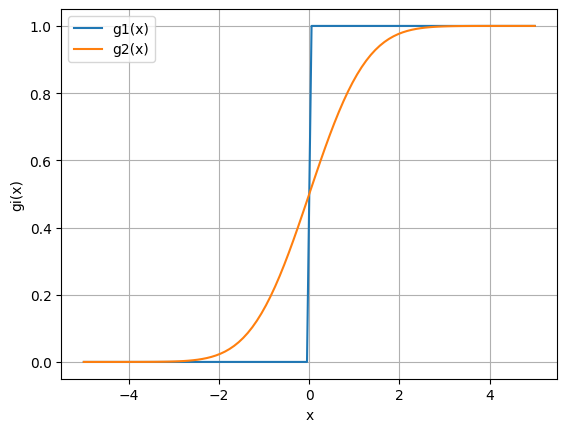

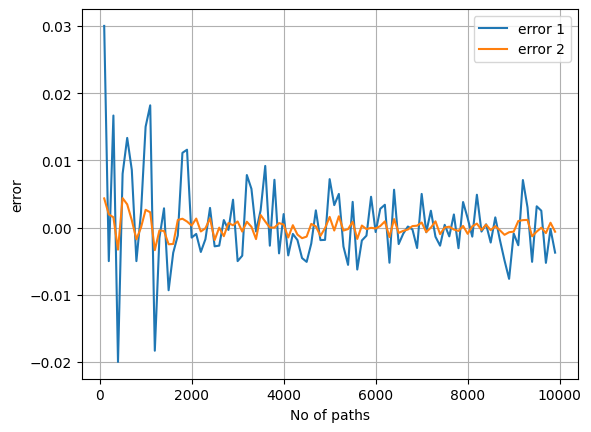

In [2]:
#%%
"""
Created on Jan 20 2019
Smoothness of the payoff and Monte Carlo convergence
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def mainCalculation():
    NoOfPaths = range(100,10000,100)
    
    # Define two payoff functions

    g1 = lambda x: (x > 0.0)    # Returns True if x > 0, else False
    g2 = lambda x: st.norm.cdf(x)
    
    # Plot the g1 and g2 functions

    x =np.linspace(-5.0,5.0,100)
    plt.figure(1)
    plt.plot(x,g1(x))
    plt.plot(x,g2(x))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('gi(x)')
    plt.legend(['g1(x)','g2(x)'])

    # Store the errors 

    error1 = np.zeros([len(NoOfPaths),1])
    error2 = np.zeros([len(NoOfPaths),1])
    
    for idx, noOfPaths in enumerate(NoOfPaths):
        W1 = np.random.normal(0.0,1.0,[noOfPaths,1])
        if noOfPaths > 1:
            W1 = (W1 - np.mean(W1)) / np.std(W1)
        approx1 = np.mean(g1(W1))
        approx2 = np.mean(g2(W1))
        error1[idx] = approx1 - 0.5
        error2[idx] = approx2 - 0.5
    
    # Plot convergence results

    plt.figure(2)
    plt.plot(NoOfPaths,error1)
    plt.plot(NoOfPaths,error2)
    plt.grid()
    plt.xlabel('No of paths')
    plt.ylabel('error')
    plt.legend(['error 1','error 2'])

mainCalculation()